In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
raw = pd.read_csv("/kaggle/input/sea-temp/01-sea-temperature.csv")
raw.head()

,id,salinity,temperature
0,0,33.440,10.50
1,1,33.440,10.46
2,2,33.437,10.46
3,3,33.420,10.45
4,4,33.421,10.45


we can solve the following system of equation with linear algebra:
$$y_i = b + mx_i+e_i $$

By deffining tha matices:



$$ Y = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}, X = \begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\1 & x_n \end{bmatrix}, A = \begin{bmatrix} b \\ m \end{bmatrix}, E = \begin{bmatrix} e_1 \\ e_2 \\ \vdots \\ e_n \end{bmatrix} $$

We get the following matrix equation to solve for A:

$$Y = XA+E$$

This equation can be solve by:

$$A = (X^TX)^{-1}X^TY$$



In [7]:
class Dataset:
    def __init__(self, X: np.array, y:np.array):
        self.X = X
        self.y = y

    def plot_data(self):
        plt.plot(self.X, self.y, 'o')

In [8]:
class Linear_regression_model(Dataset):
    def __init__(self, X,y):
        super().__init__(X,y)
        self.y = self.y.reshape((-1,1))
        self.X = np.asanyarray([np.ones(len(self.X)), self.X]).T

    def train(self):
        U = self.X.T @ self.X
        self.A = np.linalg.inv(U) @ self.X.T @ self.y
        self.b = self.A[0]
        self.m = self.A[1]

    def print_fun(self):
        print('The regretion equietion is: \n \n y = '+ str(self.b) + ' + ' + str(self.m)+ 'x')

    def plot_model(self):
        plt.plot(self.X, self.b+self.m * self.X)

In [10]:
salinity = raw.salinity.to_numpy()
temperature = raw.temperature.to_numpy()
model = Linear_regression_model(salinity, temperature)
model.train()
model.print_fun()

The regretion equietion is: 
 
 y = [169.11155524] + [-4.79633916]x


Text(0, 0.5, 'Temerature')

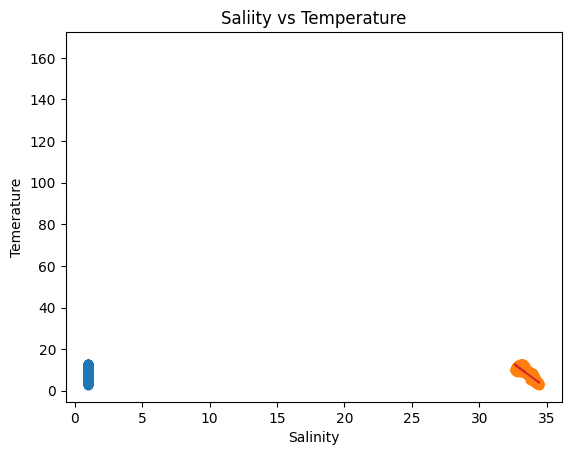

In [11]:
"""Plot data and final equation"""
model.plot_data()
model.plot_model()
plt.title('Saliity vs Temperature')
plt.xlabel('Salinity')
plt.ylabel('Temerature')